In [1]:
import pandas as pd
import numpy as np

In [2]:
players = pd.read_csv("players_22.csv")

C:\Users\azrul\AppData\Local\Temp\ipykernel_17560\2061566770.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
players = players.dropna(subset=features)

In [6]:
data = players[features].copy()

In [7]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


# Pseudocode

## High level

1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

In [8]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [9]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [10]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


In [11]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [12]:
centroids = random_centroids(data, 5)

C:\Users\azrul\AppData\Local\Temp\ipykernel_17560\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [13]:
centroids

,0,1,2,3,4
overall,4.695652,4.913043,3.608696,4.695652,6.217391
potential,6.000000,5.782609,6.000000,5.347826,6.217391
wage_eur,1.100143,1.185980,1.042918,1.000000,1.008584
value_eur,1.489250,1.056240,1.029177,1.118098,1.045930
age,5.814815,3.592593,3.592593,5.814815,2.481481


In [14]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [15]:
labels = get_labels(data, centroids)

In [16]:
labels.value_counts()

3    5237
2    4449
1    4109
4    2946
0    2424
Name: count, dtype: int64

In [17]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [63]:
# from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output


class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean_ = None
        self.components_ = None

    def fit_transform(self, X):
        # Standardize the data (mean=0, variance=1)
        standardized_data = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        # Calculate the covariance matrix
        covariance_matrix = np.cov(standardized_data, rowvar=False)

        # Calculate the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort the eigenvalues and corresponding eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top 'n_components' eigenvectors
        self.components_ = eigenvectors[:, :self.n_components]

        # Project the original data onto the principal components
        transformed_data = np.dot(standardized_data, self.components_)

        return transformed_data
    
    def transform(self, X):
        # Project data onto the principal components
        standardized_data = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        transformed_data = np.dot(standardized_data, self.components_)

        return transformed_data


In [66]:
# def plot_clusters(data, labels, centroids, iteration):
#     pca = CustomPCA(n_components=2)
#     data_2d = CustomPCA.fit_transform(data)
#     centroids_2d = CustomPCA.transform(centroids.T)
#     clear_output(wait=True)
#     plt.title(f'Iteration {iteration}')
#     plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
#     plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
#     plt.show()

def plot_clusters(data, labels, centroids, iteration):
        pca = CustomPCA(n_components=2)
        data_2d = pca.fit_transform(data)  # Call the method on an instance of CustomPCA
        centroids_2d = pca.transform(centroids.T)
        clear_output(wait=True)
        plt.title(f'Iteration {iteration}')
        plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
        plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
        plt.show()

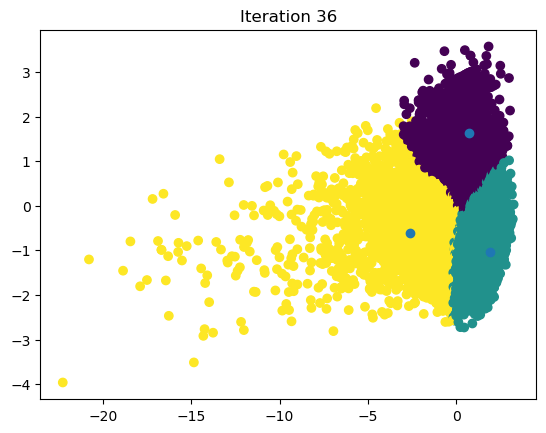

In [67]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [68]:
centroids

,0,1,2
overall,5.200401,3.443294,6.336567
potential,4.894314,5.362259,7.107863
wage_eur,1.130802,1.031502,1.460086
value_eur,1.049844,1.029525,1.313192
age,5.962199,2.678624,3.877681


In [69]:
labels.value_counts()

0    7192
1    6198
2    5775
Name: count, dtype: int64

In [70]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
199,Pepe,82,82,14000.0,5500000.0,38
284,Joaquín,81,81,23000.0,8500000.0,39
292,José Fonte,81,81,30000.0,4600000.0,37
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
...,...,...,...,...,...,...
18890,S. Haokip,51,51,500.0,60000.0,28
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36


In [71]:
from sklearn.cluster import KMeans

In [72]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [73]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,3.870830,6.779406,5.238484
potential,5.655181,7.236628,4.903164
wage_eur,1.043451,1.717969,1.127829
value_eur,1.038927,1.453621,1.045076
age,2.905049,4.443920,6.141748


# kmeans scratch

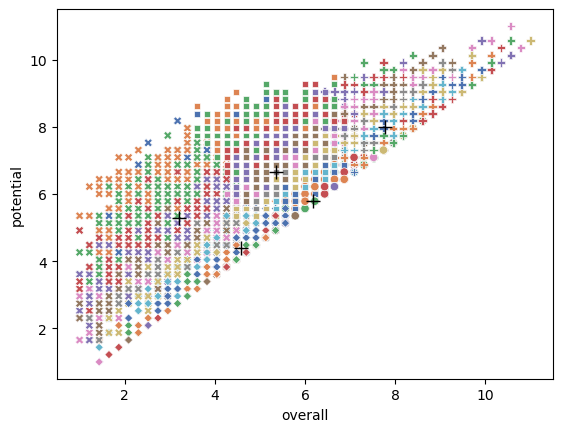

In [53]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train):
        # Initialize the centroids, using the "k-means++" method
        # Pick a random index from train data for the first centroid
        first_centroid_idx = np.random.choice(range(len(X_train)))
        self.centroids = [X_train.iloc[first_centroid_idx].to_numpy()]

        for _ in range(self.n_clusters - 1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train.to_numpy()) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids.append(X_train.iloc[new_centroid_idx].to_numpy().flatten())  # Flatten to ensure a 1D array

        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to the nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train.to_numpy():
                dists = euclidean(x, np.array(self.centroids))
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # Push current centroids to previous, reassign centroids as the mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]
            
            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X.to_numpy():
            dists = euclidean(x, np.array(self.centroids))
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs


# Assuming 'data' is your DataFrame containing the training data
# Assuming 'centers' is the number of clusters
# Make sure you have 'data' and 'centers' defined before running this
X_train = data
centers = 5

# Assuming 'true_labels_column_name' is the actual column name for true labels
true_labels = X_train['age']

# Fit centroids to dataset
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=X_train.iloc[:, 0],
                y=X_train.iloc[:, 1],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot(np.array(kmeans.centroids)[:, 0],
         np.array(kmeans.centroids)[:, 1],
         'k+',
         markersize=10,
         )
plt.show()
